#Вычисление несобственных интегралов численными методами.


In [ ]:
import numpy as np

In [ ]:
x = var("x")

## Проблемы, возникающие при попытке применить классические методы численного интегрирования к несобственным интегралам

#### Попадание сетки в точку вблизи бесконечности:

1/sqrt(-x + 2)

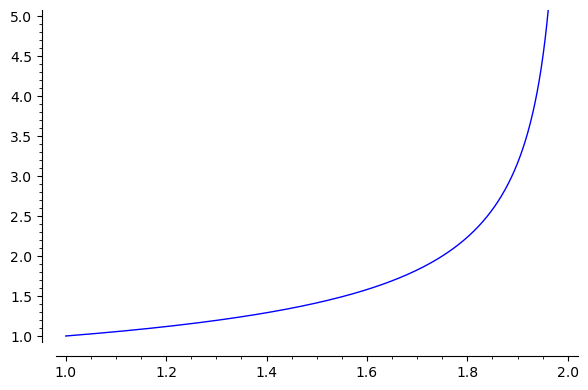

'Аналитически выисленное значение интеграла: 2.00000000000000'

'Вычисленное немодифицированным методом трапеций значение: 152.649243796903'

In [ ]:
func = 1/(sqrt(2-x))
show(func)
show(plot(func,xmin = 1,xmax = 2,ymax = 5))
#интеграл,вычисленный непосредственно
show("Аналитически выисленное значение интеграла: {}".format(integral(func,x,1,2).n()))
show("Вычисленное немодифицированным методом трапеций значение: {}".format(integrate(func,1,2,0.0001,"trap",trace = True)))

Пытаемся интегрировать сетодом трапеций:

In [ ]:
integrate(func,1,2,0.0001,"trap",trace = True)

152.649243796903

In [ ]:
h = 0.001

In [ ]:
show("Метод прямоугольников")
show("Результат: {}\n\t Шаг интегрирования: {}\n\t Ошибка (Рунге Ромберг | 0.015): {}\n\t Ошибка (Истинная) {}".
     format(integrate(func,X0,X1,h,"trap",trace = true),
            h.n(digits = 2),
            abs(runge_rumbert_error(func,X0,X1,h,0.01,"trap")),
            abs(integrate(func,X0,X1,h,"trap") - integral(func,x,X0,X1).n(digits = 50))))

'Метод прямоугольников'

'Результат: 1508.59229291816\n\t Шаг интегрирования: 0.0010\n\t Ошибка (Рунге Ромберг | 0.015): 1521.81634083067\n\t Ошибка (Истинная) 1506.59229291816'

#### Попадание сетки в бесконечность

1/sqrt(-x^2 + 4*x)

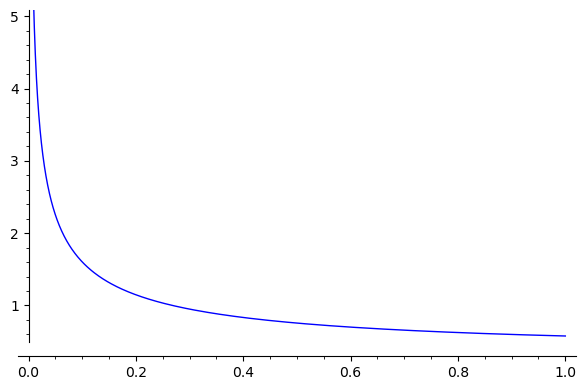

1.04719755119660

In [ ]:
func = 1/(sqrt(-x**2+4*x))
show(func)
show(plot(func,xmin = 0,xmax = 1,ymax = 5))
#интеграл,вычисленный непосредственно
show(integral(func,x,0,1).n())

#### Невозможность численно интегрировать до бесконечности

In [ ]:
func = 1/(x**2 + 1)
show(func)
integral(func,x,1,infinity).n()

1/(x^2 + 1)

0.785398163397448

Непонятно, какое число брать в качестве правого предела интегрирования  
Если взять слишком малый предел, точность не будет возрастать при сколь угодно большом увеличении мелкости сетки

In [ ]:
integrate(func,1,10,0.001,"rect")

0.685729490154680

Попытаемся оценить ошибку методом Рунге Ромберга

'f(x) ='

1/(x^2 + 1)

'Метод прямоугольников'

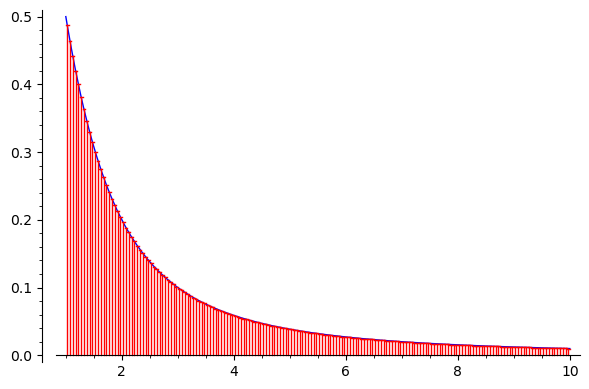

'Результат: 0.685677631807072\n\t Шаг интегрирования: 0.050\n\t Ошибка (Рунге Ромберг | 0.015): 0.0000526572856806114\n\t Ошибка (Истинная) 0.0997205315903765'

In [ ]:
func = 1/(1+x**2)
X0 = 1
X1 = 10
h = 0.05
f = func
show("f(x) =")
show((f(x)))

show("Метод прямоугольников")
show("Результат: {}\n\t Шаг интегрирования: {}\n\t Ошибка (Рунге Ромберг | 0.015): {}\n\t Ошибка (Истинная) {}".
     format(integrate(func,X0,X1,h,"rect",trace = true),
            h.n(digits = 2),
            abs(runge_rumbert_error(func,X0,X1,h,0.015,"rect")),
            abs(integrate(func,X0,X1,h,"rect") - integral(func,x,X0,infinity).n(digits = 50))))

Видим, что ошибка, определяемая методом Рунге Ромберга сильно меньше истинной

Справедливости ради, стоит отметить, что в большинстве случаев классические квадратурные методы дают неплохую точность и для несобственных интегралов, однако их непредсказуемое поведение в определенных ситуациях не позволяет говорить об их применимости в решении задачи вычисления несобственных интегралов

In [ ]:
def runge_romberg_error_h(r1,r2,k,a): #счет ошибки методом Рунге-Ромберга

    err = (r1 - r2)/(k**a - 1)

    return err

def runge_romberg_error(f,xmin,xmax,h,k,method): #счет ошибки методом Рунге-Ромберга
    r1 = integrate(f,X0,X1,h,method)
    r2 = integrate(f,X0,X1,h*k,method)

    a = 1
    if method == "simpson":
        a = 2

    err = (r1 - r2)/(k**a - 1)

    return err

def plot_sq_int(pts):
    if(len(pts) != 3):
        return false
    a = var("a0,a1,a2")
    fx = a[0]*x**2 + a[1]*x**1 + a[2]
    sols = solve([fx(x = pts[0][0]) == pts[0][1], fx(x = pts[1][0]) == pts[1][1],fx(x = pts[2][0]) == pts[2][1]],a)
    A = []
    for k in sols[0]:
        A.append(k.rhs())
    func = A[0]*x**2 + A[1]*x + A[2]
    return plot(func(x = x),xmin = pts[0][0],xmax = pts[2][0],color = "red")


def integrate(func,xmin,xmax,h,method,trace = false, eps = 1e-5):
    if(h <= 0): #чтоб не упал в бесконечный цикл
        return false

    step = h
    xcur = xmin
    res = 0

    traceplt = 0

    if(h < 0.01):#если шаг очень мал, то трэйсить не надо
        trace = False

    if(trace):
        traceplt = plot(func,xmin = xmin, xmax = xmax)



    if(method == "simpson"):
        while (xcur + 2*step <= xmax + eps):
            if(trace):
                fi1 = func(x = xcur)
                fi2 = func(x = xcur + step)
                fi3 = func(x = xcur + 2*step)

                traceplt += line([(xcur,0),(xcur,fi1)],color = "red")
                traceplt += line([(xcur + step,0),(xcur + step,fi2)],color = "red")
                traceplt += line([(xcur + 2*step,0),(xcur + 2*step,fi3)],color = "red")

                traceplt += plot_sq_int([(xcur,fi1),(xcur + step,fi2),(xcur + 2*step,fi3)])
            res += func(x = xcur) + 4*func(x = xcur + step) + func(x = xcur + 2*step)
            xcur += step*2
        res *= step/3
    else:
        if(method == "trap"):
            while (xcur + step <= xmax + eps):
                if(trace):
                    fi1 = func(x = xcur)
                    fi2 = func(x = xcur + step)
                    traceplt += line([(xcur,0),(xcur,fi1)],color = "red")
                    traceplt += line([(xcur + step,0),(xcur + step,fi2)],color = "red")
                    traceplt += line([(xcur, fi1),(xcur + step, fi2)],color = "red")

                res += func(x = xcur) + func(x = xcur + step)
                xcur += step
            res *= step/2
        else:
            if(method == "rect"):
                while (xcur + step <= xmax + eps):
                    if(trace):
                        fi = func(x = xcur + step/2)
                        traceplt += line([(xcur + step/2,0),(xcur + step/2,fi)],color = "red")
                        traceplt += line([(xcur, fi),(xcur + step, fi)],color = "red")

                    res += func(x = xcur + step/2)
                    xcur += step
                res*=step
            else:
                print("ERROR: wrong method")
                return false
    if(trace):
        show(traceplt)
    return res.n()

# Несобственные интегралы второго рода

### Метод выделения особой точки

Данный метод работает для функций вида:  
     ((x-a)^alpha) * ksi(x)

In [ ]:
(x,a,alpha,ksi,f) = var('x,a,alpha,ksi,f')
func = ((x-a)**alpha)*f
show(func)

(-a + x)^alpha*f

где a - особая точка  
а -1 < alpha < 0

In [ ]:
def pairTaylor_series(f,a,n,sep = 0.5):
    df = f.derivative()
    scur = f(x = a)
    ssec = 0
    for i in range(1,n + 1):
        #print(df)
        if( i <= n*sep):
            scur += df(x = a)/(factorial(i)) * (x - a)**(i)
        else:
            ssec += df(x = a)/(factorial(i)) * (x - a)**(i)
        df = df.derivative()
    return (scur,ssec)

In [ ]:
f = ln(x + 1)

In [ ]:
Tf,Ts = pairTaylor_series(f,0,5)
Tf += Ts
Tf

1/5*x^5 - 1/4*x^4 + 1/3*x^3 - 1/2*x^2 + x

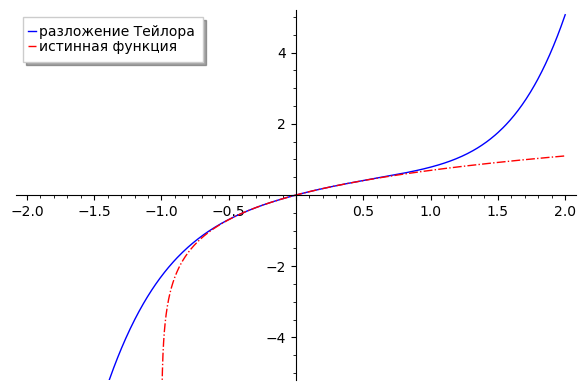

In [ ]:
show(plot(Tf,xmin = -2,xmax = 2,legend_label = "разложение Тейлора") +
     plot(f,xmin = -1.0001,xmax = 2, color = "red",legend_label = "истинная функция",linestyle = "-."),ymin = -5,ymax = 5)

In [ ]:
a = 0
al = (-1/2)
csi =  (1-x)**(-1/2)

X0 = 0
X1 = 0.5

f = ((x - a)**al)*csi(x)

show(f)

1/(sqrt(x)*sqrt(-x + 1))

46189/262144*x^10 + 12155/65536*x^9 + 6435/32768*x^8 + 429/2048*x^7 + 231/1024*x^6 + 63/256*x^5 + 35/128*x^4 + 5/16*x^3 + 3/8*x^2 + 1/2*x + 1

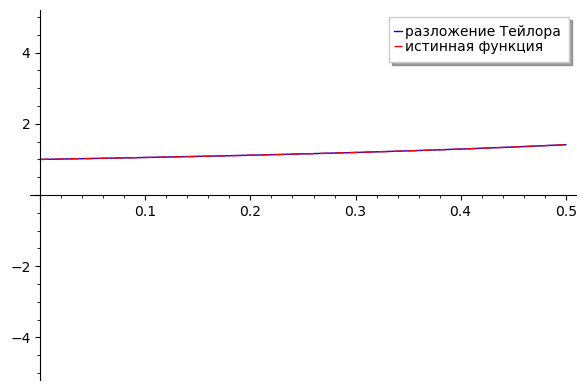

In [ ]:
Tf,Ts = pairTaylor_series(csi,0,10)
T = Tf + Ts
show(T)

show(plot(T,xmin = X0,xmax = X1,legend_label = "разложение Тейлора") +
     plot(csi,xmin = X0,xmax = X1, color = "red",legend_label = "истинная функция",linestyle = "-."),ymin = -5,ymax = 5)

In [ ]:
g(x) = ((x - a)**al)*Tf
phi(x) = ((x - a)**al)*Ts

g(x) = g(x).expand().simplify()
phi(x) = phi(x).expand().simplify()

show("g(x) = ")
show(g(x).expand().simplify())
show("phi(x) = ")
show(phi(x).expand().simplify())

'g(x) = '

63/256*x^(9/2) + 35/128*x^(7/2) + 5/16*x^(5/2) + 3/8*x^(3/2) + 1/2*sqrt(x) + 1/sqrt(x)

'phi(x) = '

46189/262144*x^(19/2) + 12155/65536*x^(17/2) + 6435/32768*x^(15/2) + 429/2048*x^(13/2) + 231/1024*x^(11/2)

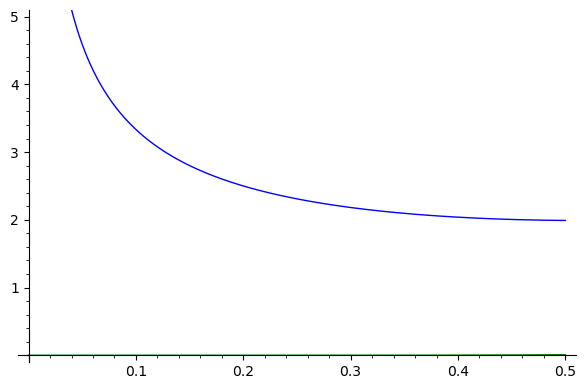

In [ ]:
show(plot(g(x),xmin = X0,xmax = X1) + plot(phi(x),xmin = X0,xmax = X1,color = "green"),ymin = 0,ymax =5)

In [ ]:
result = integral(g(x),x,X0,X1) + integrate(phi(x),X0,X1,0.01,"rect")
show(result)

1.5707867680588379

In [ ]:
 integrate(phi(x),X0,X1,0.001,"simpson")

0.000640102529309632

In [ ]:
integral(g(x),x,X0,X1)

1.5701471425751357

In [ ]:
def pairTaylor_series(f,a,n,sep = 0.5):
    df = f.derivative()
    scur = f(x = a)
    ssec = 0
    for i in range(1,n + 1):
        if( i < n*sep):
            scur += df(x = a)/(factorial(i)) * (x - a)**(i)
        else:
            ssec += df(x = a)/(factorial(i)) * (x - a)**(i)
        df = df.derivative()
    return (scur,ssec)

def Improper_integral_SP_isolation(h = 0.01, #решение несобственного интеграла второго рода методом выделения особенности
                                   trace = false, #применимо лишь для функций определенного вида
                                   sep = 0.5,
                                   method = "rect"):
    Tf,Ts = pairTaylor_series(csi,0,10,sep = sep)
    T = Tf + Ts
    if(trace):
        show(T)

        show(plot(T,xmin = X0,xmax = X1,legend_label = "разложение Тейлора") +
             plot(csi,xmin = X0,xmax = X1, color = "red",legend_label = "истинная функция",linestyle = "-."),
             ymin = -5,ymax = 5)

    g(x) = ((x - a)**al)*Tf
    phi(x) = ((x - a)**al)*Ts

    g(x) = g(x).expand().simplify()
    phi(x) = phi(x).expand().simplify()

    if(trace):
        show("g(x) = ")
        show(g(x).expand().simplify())
        show("phi(x) = ")
        show(phi(x).expand().simplify())
        show(plot(g(x),xmin = X0,xmax = X1,legend_label = "g(x)") +
             plot(phi(x),xmin = X0,xmax = X1,color = "green",legend_label = "phi(x)"),
             ymin = 0,ymax =5)

    result = integral(g(x),x,X0,X1) + integrate(phi(x),X0,X1,h,method)
    return result

'Необходимо рассчитать интеграл этой функции:'

1/(sqrt(x)*sqrt(-x + 1))

'От 0.00000 до 0.50000'

'Ее график:'

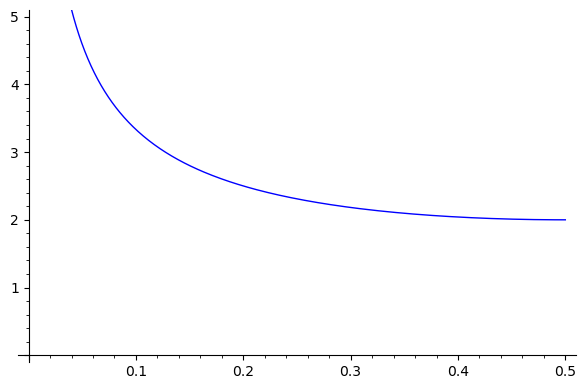

In [ ]:
a = 0
al = (-1/2)
csi =  (1-x)**(-1/2)

X0 = 0
X1 = 0.5

f = ((x - a)**al)*csi(x)

show("Необходимо рассчитать интеграл этой функции:")
show(f)
show("От {} до {}".format(X0.n(digits = 5),X1.n(digits = 5)))

show("Ее график:")
show(plot(f,xmin = X0, xmax = X1,ymin = 0,ymax = 5))

46189/262144*x^10 + 12155/65536*x^9 + 6435/32768*x^8 + 429/2048*x^7 + 231/1024*x^6 + 63/256*x^5 + 35/128*x^4 + 5/16*x^3 + 3/8*x^2 + 1/2*x + 1

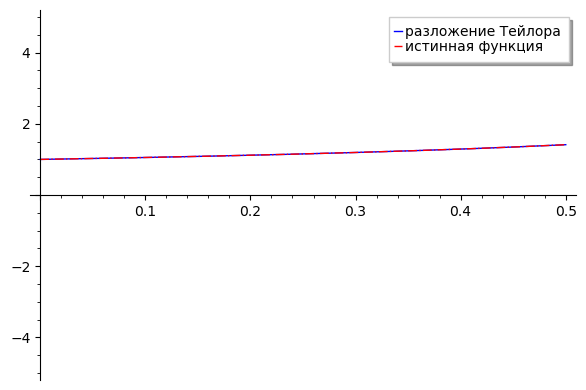

'g(x) = '

1/sqrt(x)

'phi(x) = '

46189/262144*x^(19/2) + 12155/65536*x^(17/2) + 6435/32768*x^(15/2) + 429/2048*x^(13/2) + 231/1024*x^(11/2) + 63/256*x^(9/2) + 35/128*x^(7/2) + 5/16*x^(5/2) + 3/8*x^(3/2) + 1/2*sqrt(x)

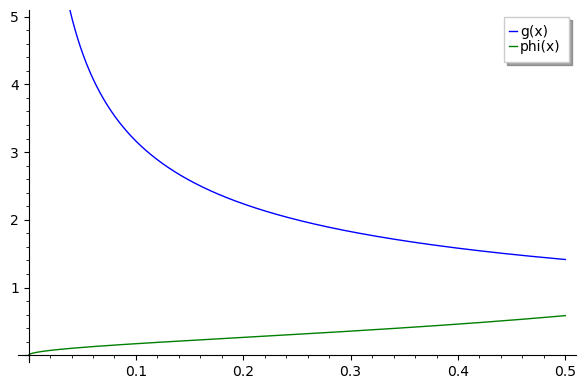

1.5711839598201678

In [ ]:
print("\n\n")
res = Improper_integral_SP_isolation(h = 0.1,sep = 0.1,trace = true)
show(res)

In [ ]:
h = 0.1

In [ ]:
show("Метод выделения особенности")
show("Результат: {}\n\t Шаг интегрирования: {}\n\t Ошибка (Рунге Ромберг | 0.01): {}\n\t Ошибка (Истинная) {}".
     format(Improper_integral_SP_isolation(h,trace = false),
            h.n(digits = 2),
            abs(runge_romberg_error_h(Improper_integral_SP_isolation(h,sep = 0.1),Improper_integral_SP_isolation(h*0.01,sep = 0.1),0.01,1)),
            abs(Improper_integral_SP_isolation(h,sep = 0.1) - integral(f,x,X0,X1).n(digits = 50))))

'Метод выделения особенности'

'Результат: 1.5707005541572556\n\t Шаг интегрирования: 0.10\n\t Ошибка (Рунге Ромберг | 0.01): 0.00039980858781429873\n\t Ошибка (Истинная) 0.00038763302527100585'

In [ ]:
show("Метод прямоугольников")
show("Результат: {}\n\t Шаг интегрирования: {}\n\t Ошибка (Рунге Ромберг | 0.015): {}\n\t Ошибка (Истинная) {}".
     format(integrate(f,X0,X1,h,"rect",trace = false),
            h.n(digits = 2),
            abs(runge_rumbert_error(f,X0,X1,h,0.01,"rect")),
            abs(integrate(f,X0,X1,h,"rect") - integral(f,x,X0,X1).n(digits = 50))))

'Необходимо рассчитать интеграл этой функции:'

1/(x^0.909090909090909*sqrt(-x + 1))

'От 0.00000 до 0.50000'

'Ее график:'

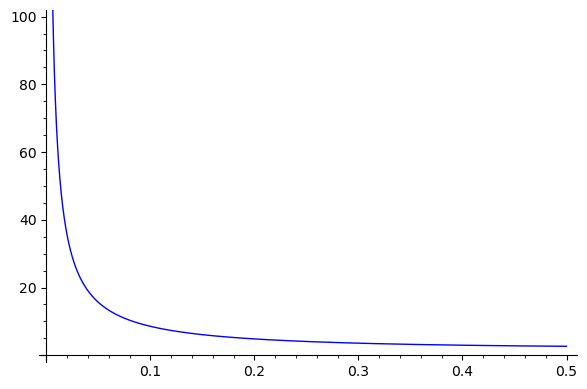

In [ ]:
a = 0
al = (-1/1.1)
csi =  (1-x)**(-1/2)

X0 = 0
X1 = 0.5

f = ((x - a)**al)*csi(x)

show("Необходимо рассчитать интеграл этой функции:")
show(f)
show("От {} до {}".format(X0.n(digits = 5),X1.n(digits = 5)))

show("Ее график:")
show(plot(f,xmin = X0, xmax = X1,ymin = 0,ymax = 100))

Основной минус этого метода заключается в том, что он требует непосредственного вычисления интеграла, и оттого не может считаться на 100% численным.

### Метод исключения особой точки

С пердварительной обработкой

In [ ]:
def Improper_integral_SP_exclusion(#функция обнаруживает точечнык особенности, и при интегрировании пропускает их
                                   f,X0,X1,h,
                                   trace = false,
                                   method = "rect",
                                   eps = 1e-4):
                                   #без сдвига сетки
    hc = h #с шагом h будем вычислять производную
    h /= 2 #проверять надо точки, из которых будем брать занчения f
    infpos = 1/h
    infneg = -1/h
    xcur = X0
    if(trace):
            print("{} -- {} | checking...".format(X0,X1))

    i = 0
    repmark = (X1-X0)/(hc*10)
    result = 0
    while (xcur < X1 + h*eps):

        try:
            f(x = xcur)
            if(trace and (( i % (repmark) == 0) or abs(f(x = xcur)) > infpos/10 or complex(f(x = xcur)).imag != 0)):
                print("{} -- {} ({}) -- {} \t|{}|".format(X0,xcur,f(x = xcur),X1,h))
        except(BaseException): #проверка на деление на 0
            if(trace):
                print(" |0|")
                print("  !{} -- {} (NAN) -- {} \t|{}|".format(X0,xcur,X1,h))
            if(xcur - eps < X0):
                #это начальная точка
                #сдвигаем начало на шаг
                X0 += hc
                xcur += h
                #проверяем следующую точку
                continue
            else:
                if(xcur + eps > X1):
                    #это последняя точка
                    #после инетгрировать не нужно
                    if(trace):
                        print("integrating ps...")
                    return integrate(f,X0,X1 - hc, h = hc,method = method,eps = hc*eps, trace = trace)
                else:
                    #это точка в середине
                    if(trace):
                        print("integrating fu ps...")
                    #интегрироуем до последнего проверенного узла
                    result += integrate(f,X0,xcur - hc, h = hc,method = method,eps = hc*eps, trace = trace)
                    #продолжаем проверку со следующего узла
                    X0 = xcur + hc
                    continue

        if (f(x = xcur) > infpos or f(x = xcur) < infneg): #проверка на сверхбольшие значения
            if(trace):
                print(" |inf|")
                print("  !{} -- {} ({}) -- {} \t|{}|".format(X0,xcur,f(x = xcur),X1,h))
            if(xcur - eps < X0):
                #это начальная точка
                #сдвигаем начало на шаг
                X0 += hc
                xcur += h
                #проверяем следующую точку
                continue
            else:
                if(xcur + eps > X1):
                    #это последняя точка
                    #после инетгрировать не нужно
                    if(trace):
                        print("integrating ps...")
                    return integrate(f,X0,X1 - hc, h = hc,method = method,eps = hc*eps, trace = trace)
                else:
                    #это точка в середине
                    if(trace):
                        print("integrating fu ps...")
                    #интегрироуем до последнего проверенного узла
                    result += integrate(f,X0,xcur - hc, h = hc,method = method,eps = hc*eps, trace = trace)
                    #продолжаем проверку со следующего узла
                    X0 = xcur + hc
                    continue

        if (complex(f(x = xcur)).imag != 0):
            if(trace):
                print(" |complex|")
                print("  !{} -- {} ({}) -- {} \t|{}|".format(X0,xcur,f(x = xcur),X1,h))
            if(xcur - eps < X0):
                #это начальная точка
                #сдвигаем начало на шаг
                X0 += hc
                xcur += h
                #проверяем следующую точку
                continue
            else:
                if(xcur + eps > X1):
                    #это последняя точка
                    #после инетгрировать не нужно
                    if(trace):
                        print("integrating ps...")
                    return integrate(f,X0,X1 - hc, h = hc,method = method,eps = hc*eps, trace = trace)
                else:
                    #это точка в середине
                    if(trace):
                        print("integrating fu ps...")
                    #интегрироуем до последнего проверенного узла
                    result += integrate(f,X0,xcur - hc, h = hc,method = method,eps = hc*eps, trace = trace)
                    #продолжаем проверку со следующего узла
                    X0 = xcur + hc
                    continue

        xcur += h
        i += 1

    if(trace):
            print("integrating...")

    return result + integrate(f,X0,X1,hc,method = method)

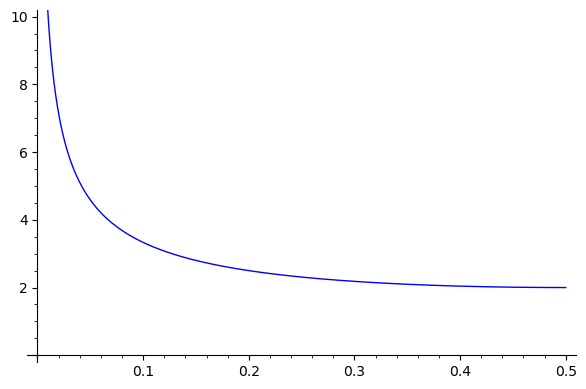

In [ ]:
show(plot(f,xmin = X0, xmax = X1,ymin = 0,ymax = 10))

In [ ]:
integral(f,x,X0,X1)

pi - 1.5707963267948966

In [ ]:
Improper_integral_SP_exclusion(f,X0,X1,h = 0.00001,trace = true,method = "trap")

0 -- 0.500000000000000 | checking...
 |0|
  !0 -- 0 (NAN) -- 0.500000000000000 	|5.00000000000000e-6|
0.0000100000000000000 -- 5.00000000000000e-6 (447.214713538139) -- 0.500000000000000 	|5.00000000000000e-6|
0.0000100000000000000 -- 0.0250050000000023 (6.40450215747031) -- 0.500000000000000 	|5.00000000000000e-6|
0.0000100000000000000 -- 0.0500049999999970 (4.58809735283853) -- 0.500000000000000 	|5.00000000000000e-6|
0.0000100000000000000 -- 0.0750050000000046 (3.79651569580492) -- 0.500000000000000 	|5.00000000000000e-6|
0.0000100000000000000 -- 0.100005000000030 (3.33325926219080) -- 0.500000000000000 	|5.00000000000000e-6|
0.0000100000000000000 -- 0.125005000000055 (3.02366395062394) -- 0.500000000000000 	|5.00000000000000e-6|
0.0000100000000000000 -- 0.150005000000080 (2.80052173006020) -- 0.500000000000000 	|5.00000000000000e-6|
0.0000100000000000000 -- 0.175005000000105 (2.63177715849876) -- 0.500000000000000 	|5.00000000000000e-6|
0.0000100000000000000 -- 0.200005000000130 (2

1.56459713033287

Этот метод дает довольно большую ошибку, но при этом исключает возможность возникновения экстримальных значений и ошибок деления на ноль

Попробуем решить ту задачу, что дала неадекватный результат методом трапеций

1/sqrt(-x + 2)

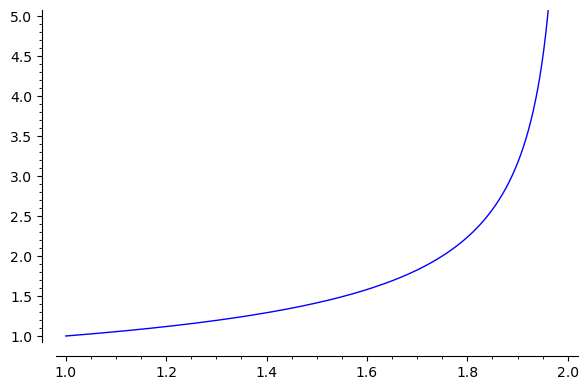

2.00000000000000

In [ ]:
func = 1/(sqrt(2-x))
X0 = 1
X1 = 2
h = 0.01
show(func)
show(plot(func,xmin = 1,xmax = 2,ymax = 5))
#интеграл,вычисленный непосредственно
show(integral(func,x,1,2).n())

In [ ]:
Improper_integral_SP_exclusion(func,1,2,0.0001,method = "trap",trace = true)

1 -- 2 | checking...
1 -- 1 (1) -- 2 	|0.0000500000000000000|
1 -- 1.05000000000011 (1.02597835208521) -- 2 	|0.0000500000000000000|
1 -- 1.10000000000021 (1.05409255338958) -- 2 	|0.0000500000000000000|
1 -- 1.15000000000032 (1.08465228909348) -- 2 	|0.0000500000000000000|
1 -- 1.20000000000042 (1.11803398875019) -- 2 	|0.0000500000000000000|
1 -- 1.25000000000053 (1.15470053837966) -- 2 	|0.0000500000000000000|
1 -- 1.30000000000063 (1.19522860933493) -- 2 	|0.0000500000000000000|
1 -- 1.35000000000074 (1.24034734589279) -- 2 	|0.0000500000000000000|
1 -- 1.40000000000084 (1.29099444873671) -- 2 	|0.0000500000000000000|
1 -- 1.45000000000095 (1.34839972492765) -- 2 	|0.0000500000000000000|
1 -- 1.50000000000106 (1.41421356237459) -- 2 	|0.0000500000000000000|
1 -- 1.55000000000116 (1.49071198500178) -- 2 	|0.0000500000000000000|
1 -- 1.60000000000127 (1.58113883008669) -- 2 	|0.0000500000000000000|
1 -- 1.65000000000137 (1.69030850946035) -- 2 	|0.0000500000000000000|
1 -- 1.70000000

1.98039645448383

In [ ]:
h = 0.01
show("Метод исключения особенности")
show("Результат: {}\n\t Шаг интегрирования: {}\n\t Ошибка (Рунге Ромберг | 0.01): {}\n\t Ошибка (Истинная) {}".
     format(Improper_integral_SP_exclusion(f,X0,X1,h = h,method = "trap"),
            h.n(digits = 2),
            abs(runge_rumbert_error_h(Improper_integral_SP_exclusion(f,X0,X1,h = h,method = "trap"),Improper_integral_SP_exclusion(f,X0,X1,h = h*0.01,method = "rect"),0.01,1)),
            abs(Improper_integral_SP_exclusion(f,X0,X1,h = h,method = "trap") - integral(f,x,X0,X1).n(digits = 50))))

'Метод исключения особенности'

'Результат: 1.37440494673634\n\t Шаг интегрирования: 0.010\n\t Ошибка (Рунге Ромберг | 0.01): 0.177979732200823\n\t Ошибка (Истинная) 0.196391380058554'

##### Модифицированный метод исключения особенности

In [ ]:
def Improper_integral_SP_exclusion_mod(#функция обнаруживает точечнык особенности, и при интегрировании пропускает их
                                   f,X0,X1,h,
                                   trace = false,
                                   method = "rect",
                                   eps = 1e-4):
                                   #без сдвига сетки
    hc = h #с шагом h будем вычислять производную
    h /= 2 #проверять надо точки, из которых будем брать занчения f
    hsub = hc*eps #шаг для вспомогательного интегрирования
    infpos = 1/(hc*eps)
    infneg = -1/(hc*eps)
    xcur = X0
    repmark = (X1-X0)/(hc*10)
    if(trace):
            print("{} -- {} | checking...".format(X0,X1))

    i = 0
    while (xcur < X1 + h*eps):

        try:
            f(x = xcur)
            if(trace and i % (repmark) == 0):
                print("{} -- {} ({}) -- {} \t|{}|".format(X0,xcur,f(x = xcur),X1,h))
        except(BaseException): #проверка на деление на 0
            if(trace):
                print(" |0|")
                print("  !{} -- {} (NAN) -- {} \t|{}|".format(X0,xcur,X1,h))
            if(xcur - h*eps < X0):
                return (Improper_integral_SP_exclusion(f,X0 + hc,X1, h = hc,method = method,eps = eps, trace = trace) +
                        Improper_integral_SP_exclusion_mod(f,X0 + hsub,xcur + hc,hsub,method = method,eps = eps, trace = trace))
            if(xcur + h*eps > X1):
                return (integrate(f,X0,X1 - hc, h = hc,method = method,eps = hc*eps, trace = trace) +
                        Improper_integral_SP_exclusion_mod(f,X1 - hc,xcur - hsub,hsub,method = method,eps = eps, trace = trace))

            return (integrate(f,X0,xcur - hc, h = hc,method = method,eps = hc*eps, trace = trace) + #эта часть сетки уже проверена
                    Improper_integral_SP_exclusion(f,xcur + hc,X1, h = hc,method = method,eps = eps, trace = trace) +
                        Improper_integral_SP_exclusion_mod(f,xcur - hc,xcur - hsub,hsub,method = method,eps = eps, trace = trace)+
                        Improper_integral_SP_exclusion_mod(f,xcur + hsub,xcur + hc,hsub,method = method,eps = eps, trace = trace))

        if (f(x = xcur) > infpos or f(x = xcur) < infneg): #проверка на сверхбольшие значения
            if(trace):
                print(" |inf|")
                print("  !{} -- {} ({}) -- {} \t|{}|".format(X0,xcur,f(x = xcur),X1,h))
            if(xcur - h*eps < X0):
                return (Improper_integral_SP_exclusion(f,X0 + hc,X1, h = hc,method = method,eps = eps, trace = trace)+
                        Improper_integral_SP_exclusion_mod(f,X0 + hsub,xcur + hc,hsub,method = method,eps = eps, trace = trace))
            if(xcur + h*eps > X1):
                return (integrate(f,X0,X1 - hc, h = hc,method = method,eps = hc*eps, trace = trace) +
                        Improper_integral_SP_exclusion_mod(f,X1 - hc,xcur - hsub,hsub,method = method,eps = eps, trace = trace))

            return (integrate(f,X0,xcur - hc, h = hc,method = method,eps = hc*eps, trace = trace) + #эта часть сетки уже проверена
                   Improper_integral_SP_exclusion(f,xcur + hc,X1, h = hc,method = method,eps = eps, trace = trace)+
                        Improper_integral_SP_exclusion_mod(f,xcur + hsub,xcur + hc,hsub,method = method,eps = eps, trace = trace) +
                        Improper_integral_SP_exclusion_mod(f,xcur - hc,xcur - hsub,hsub,method = method,eps = eps, trace = trace))
        if (complex(f(x = xcur)).imag != 0):
            if(trace):
                print(" |complex|")
                print("  !{} -- {} ({}) -- {} \t|{}|".format(X0,xcur,f(x = xcur),X1,h))

            if(xcur - h*eps < X0):
                return (Improper_integral_SP_exclusion(f,X0 + hc,X1, h = hc,method = method,eps = eps, trace = trace)+
                        Improper_integral_SP_exclusion_mod(f,X0 + hsub,xcur + hc,hsub,method = method,eps = eps, trace = trace))
            if(xcur + h*eps > X1):
                return (integrate(f,X0,X1 - hc, h = hc,method = method,eps = hc*eps, trace = trace) +
                        Improper_integral_SP_exclusion_mod(f,X1 - hc,xcur - hsub,hsub,method = method,eps = eps, trace = trace))

            return (integrate(f,X0,xcur - hc, h = hc,method = method,eps = hc*eps, trace = trace) + #эта часть сетки уже проверена
                   Improper_integral_SP_exclusion(f,xcur + hc,X1, h = hc,method = method,eps = eps, trace = trace)+
                        Improper_integral_SP_exclusion_mod(f,xcur + hsub,xcur + hc,hsub,method = method,eps = eps, trace = trace) +
                        Improper_integral_SP_exclusion_mod(f,xcur - hc,xcur - hsub,hsub,method = method,eps = eps, trace = trace))

        xcur += h
        i += 1

    if(trace):
            print("integrating...")

    return integrate(f,X0,X1,hc,method = method,eps = eps*hc)

1/sqrt(-x + 2)

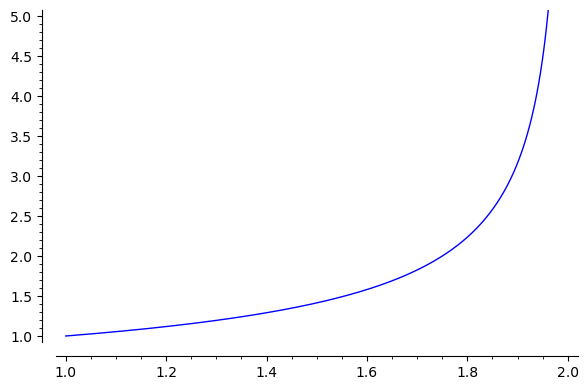

2.00000000000000

In [ ]:
func = 1/(sqrt(2-x))
X0 = 1
X1 = 2
h = 0.1
show(func)
show(plot(func,xmin = 1,xmax = 2,ymax = 5))
#интеграл,вычисленный непосредственно
show(integral(func,x,1,2).n())

In [ ]:
show("Метод исключения особенности с дополнительным интегрированием")
show("Результат: {}\n\t Шаг интегрирования: {}\n\t Ошибка (Рунге Ромберг | 0.01): {}\n\t Ошибка (Истинная) {}".
     format(Improper_integral_SP_exclusion_mod(func,X0,X1,h = h,method = "rect"),
            h.n(digits = 2),
            abs(runge_rumbert_error_h(Improper_integral_SP_exclusion_mod(func,X0,X1,h = h,method = "rect"),Improper_integral_SP_exclusion_mod(func,X0,X1,h = h*0.01,method = "rect"),0.01,1)),
            abs(Improper_integral_SP_exclusion_mod(func,X0,X1,h = h,method = "rect") - integral(func,x,X0,X1).n(digits = 50))))

'Метод исключения особенности с дополнительным интегрированием'

'Результат: 1.98777930310592\n\t Шаг интегрирования: 0.10\n\t Ошибка (Рунге Ромберг | 0.01): 0.00697763328108115\n\t Ошибка (Истинная) 0.0122206968940812'

In [ ]:
Improper_integral_SP_exclusion_mod(func,1,2,0.0001,method = "trap",trace = true)

1 -- 2 | checking...
1 -- 1 (1) -- 2 	|0.0000500000000000000|
1 -- 1.05000000000011 (1.02597835208521) -- 2 	|0.0000500000000000000|
1 -- 1.10000000000021 (1.05409255338958) -- 2 	|0.0000500000000000000|
1 -- 1.15000000000032 (1.08465228909348) -- 2 	|0.0000500000000000000|
1 -- 1.20000000000042 (1.11803398875019) -- 2 	|0.0000500000000000000|
1 -- 1.25000000000053 (1.15470053837966) -- 2 	|0.0000500000000000000|
1 -- 1.30000000000063 (1.19522860933493) -- 2 	|0.0000500000000000000|
1 -- 1.35000000000074 (1.24034734589279) -- 2 	|0.0000500000000000000|
1 -- 1.40000000000084 (1.29099444873671) -- 2 	|0.0000500000000000000|
1 -- 1.45000000000095 (1.34839972492765) -- 2 	|0.0000500000000000000|
1 -- 1.50000000000106 (1.41421356237459) -- 2 	|0.0000500000000000000|
1 -- 1.55000000000116 (1.49071198500178) -- 2 	|0.0000500000000000000|
1 -- 1.60000000000127 (1.58113883008669) -- 2 	|0.0000500000000000000|
1 -- 1.65000000000137 (1.69030850946035) -- 2 	|0.0000500000000000000|
1 -- 1.70000000

2.00020041273101

In [ ]:
Improper_integral_SP_exclusion_mod(f,X0,X1,0.00001,method = "trap",trace = true)

0 -- 0.500000000000000 | checking...
 |0|
  !0 -- 0 (NAN) -- 0.500000000000000 	|5.00000000000000e-6|
0.0000100000000000000 -- 0.500000000000000 | checking...
0.0000100000000000000 -- 0.0000100000000000000 (316.229347167527) -- 0.500000000000000 	|5.00000000000000e-6|
integrating...
1.00000000000000e-9 -- 0.0000100000000000000 | checking...
1.00000000000000e-9 -- 1.00000000000000e-9 (31622.7766174952) -- 0.0000100000000000000 	|5.00000000000000e-10|
integrating...


1.57085970434016

In [ ]:
show(integral(f,x,X0,X1).n())

1.57079632679490

'Необходимо рассчитать интеграл этой функции:'

1/(sqrt(x)*sqrt(-x + 1))

'От 0.00000 до 0.50000'

'Ее график:'

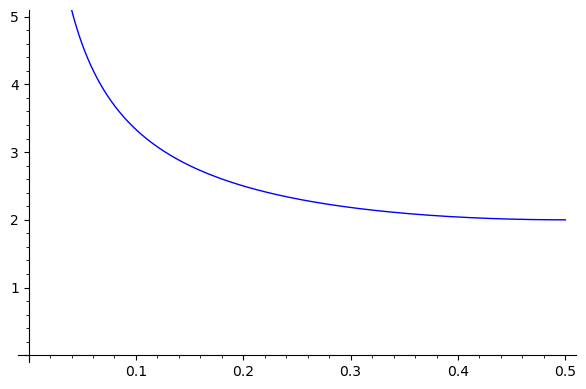

'Ее производная'

1.57079632679490

0 -- 0.500000000000000 | checking...
 |0|
  !0 -- 0 (NAN) -- 0.500000000000000 	|0.0000500000000000000|
0.000100000000000000 -- 0.500000000000000 | checking...
0.000100000000000000 -- 0.000100000000000000 (100.005000375031) -- 0.500000000000000 	|0.0000500000000000000|
0.000100000000000000 -- 0.0501000000000009 (4.58397450192027) -- 0.500000000000000 	|0.0000500000000000000|
0.000100000000000000 -- 0.100099999999997 (3.33185302371375) -- 0.500000000000000 	|0.0000500000000000000|
0.000100000000000000 -- 0.150099999999992 (2.79979181298121) -- 0.500000000000000 	|0.0000500000000000000|
0.000100000000000000 -- 0.200099999999986 (2.49953145987590) -- 0.500000000000000 	|0.0000500000000000000|
0.000100000000000000 -- 0.250099999999981 (2.30909327974475) -- 0.500000000000000 	|0.0000500000000000000|
0.000100000000000000 -- 0.300099999999975 (2.18197115742444) -- 0.500000000000000 	|0.0000500000000000000|
0.000100000000000000 -- 0.350099999999970 (2.09643149782026) -- 0.500000000000000 	|0.0

1.57099672563692

In [ ]:
a = 0
al = (-1/2)
csi =  (1-x)**(-1/2)

X0 = 0
X1 = 0.5

f = ((x - a)**al)*csi(x)

show("Необходимо рассчитать интеграл этой функции:")
show(f)
show("От {} до {}".format(X0.n(digits = 5),X1.n(digits = 5)))

show("Ее график:")
show(plot(f,xmin = X0, xmax = X1,ymin = 0,ymax = 5))

show("Ее производная")
show(integral(f,x,X0,X1).n())

Improper_integral_SP_exclusion_mod(f,X0,X1,0.0001,method = "trap",trace = true)

In [ ]:
a = 0
al = (-1/2)
csi =  (1-x)**(-1/2)
h = 0.01

X0 = 0
X1 = 0.5

f = ((x - a)**al)*csi(x)

show("Метод исключения особенности с дополнительным интегрированием")
show("Результат: {}\n\t Шаг интегрирования: {}\n\t Ошибка (Рунге Ромберг | 0.01): {}\n\t Ошибка (Истинная) {}".
     format(Improper_integral_SP_exclusion_mod(f,X0,X1,h = h,method = "rect"),
            h.n(digits = 2),
            abs(runge_rumbert_error_h(Improper_integral_SP_exclusion_mod(f,X0,X1,h = h,method = "rect"),Improper_integral_SP_exclusion_mod(f,X0,X1,h = h*0.01,method = "rect"),0.01,1)),
            abs(Improper_integral_SP_exclusion_mod(f,X0,X1,h = h,method = "rect") - integral(f,x,X0,X1).n(digits = 50))))

'Метод исключения особенности с дополнительным интегрированием'

'Результат: 1.56687645705918\n\t Шаг интегрирования: 0.010\n\t Ошибка (Рунге Ромберг | 0.01): 0.00356247139949031\n\t Ошибка (Истинная) 0.00391986973571989'

# Несобственные интегралы первого рода

In [ ]:
def Improper_integral_1(f,X0,X1,h,
                        method = "rect",
                        trace = false,
                        eps = 1e-5):

    if( (X0 > 1/eps and X1 > 1/eps) or (X0 < 1/eps and X1 < 1/eps) ): #при данной погрешности выражение не имеет смысла
        return false

    a = var("a")
    if(X0 < -1/eps):#первый \ предел в -бесконечности
        if(trace):
            print("searching for a")

        criteria = f(x = a)/a
        step = h*10

        if(X1 > 1/eps): #если и второй предел в бесконечности, то за базу берем ноль
            a = 0
        else:
            a = X1

        while(a > -1/eps):
            if(trace):
                print(" a: {} | {}".format(a,step))
            try:
                criteria(a = a)
                if(trace):
                    print(" a: {} ({})  | {}".format(a, criteria(a = a),step))
                break
            except(BaseException):
                a -= step
                step*=2

        if(a <= -1/eps): #на данной сетке интеграл не существует
            return false

        while(abs(criteria(a = a)) > eps):
            a -= step
            step*=2

            if(trace):
                print(" a: {} ({})  | {}".format(a, criteria(a = a),step))

            if(a <= -1/eps): #при данной погрешности интеграл не сходится
                return false
    else:
        a = X0

    b = var("b")
    if(X1 > 1/eps):#второй предел в бесконечности
        if(trace):
            print("searching for b")

        criteria = f(x = b)/b
        step = h*10

        b = a

        while(b < 1/eps):
            if(trace):
                print(" b: {} | {}".format(b,step))

            try:
                criteria(b = b)
                if(trace):
                        print(" b: {} ({}) | {}".format(b,criteria(b = b),step))
                break
            except(BaseException):
                b += step
                step*=2

        if(b >= 1/eps): #на данной сетке интеграл не существует
            return false

        while(abs(criteria(b = b)) > eps):
            b += step
            step*=2

            if(trace):
                print(" b: {} ({}) | {}".format(b,criteria(b = b),step))

            if(b >= 1/eps): #при данной погрешности интеграл не сходится
                return false
    else:
        b = X1

    if(trace):
        print("integrating from {} to {}".format(a,b))
        print("w step {}".format(h*(b-a)/200))

    return integrate(f,a,b,h*(b-a)/1000,method = method)



In [ ]:
f = exp(-x**2)
X0 = 0
X1 = infinity

Improper_integral_1(f,X0,X1,0.01,eps = 1e-20,trace = true)

searching for b
 b: 0 | 0.100000000000000
 b: 0.100000000000000 | 0.200000000000000
 b: 0.100000000000000 (9.90049833749168) | 0.200000000000000
 b: 0.300000000000000 (3.04643728423743) | 0.400000000000000
 b: 0.700000000000000 (0.875180563120594) | 0.800000000000000
 b: 1.50000000000000 (0.0702661497079096) | 1.60000000000000
 b: 3.10000000000000 (0.0000216305884847777) | 3.20000000000000
 b: 6.30000000000000 (9.19414743713458e-19) | 6.40000000000000
 b: 12.7000000000000 (7.06056235564279e-72) | 12.8000000000000
integrating from 0 to 12.7000000000000
w step 0.000635000000000000


0.886226925452794

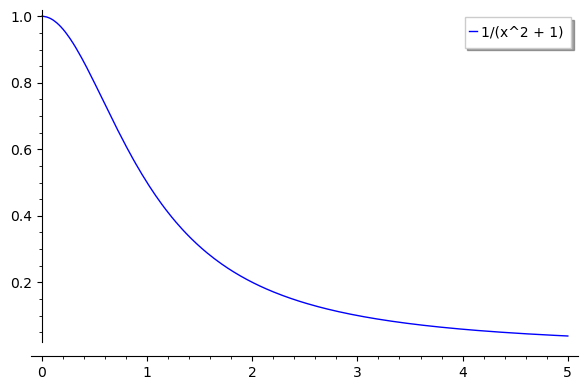

In [ ]:
plot(f,xmin = 0, xmax = 5, legend_label = "{}".format(f(x)))

In [ ]:
show(integral(f,x,X0,X1).n())

0.886226925452758

In [ ]:
h = 0.01

In [ ]:
f = exp(-x**2)
X0 = 0
X1 = infinity
h = 0.01
e = 1e-4
m = 1e-4
show(f)

show("Метод отсечения бесконечности")
show("Результат: {}\n\t Шаг интегрирования: {}\n\t Ошибка (Рунге Ромберг | 0.1): {}\n\t Ошибка (Истинная) {}".
     format(Improper_integral_1(f,X0,X1,h,eps = e),
            h.n(digits = 2),
            abs(runge_rumbert_error_h(Improper_integral_1(f,X0,X1,h,eps = e),Improper_integral_1(f,X0,X1,h,eps = e*m),m,1)),
            abs(Improper_integral_1(f,X0,X1,h,eps = e) - integral(f,x,X0,X1).n(digits = 50))))

e^(-x^2)

'Метод отсечения бесконечности'

'Результат: 0.886216602099357\n\t Шаг интегрирования: 0.010\n\t Ошибка (Рунге Ромберг | 0.1): 0.0000103243858473657\n\t Ошибка (Истинная) 0.0000103233534008984'

Задача, которую пытались решить в начале

In [ ]:
f = 1/(x**2 + 1)
show(integral(f,x,X0,X1).n())

0.785398163397448

In [ ]:
f = 1/(x**2 + 1)
show(f)
integral(f,x,1,infinity).n()

Improper_integral_1(f,X0,X1,0.01,eps = 1e-10,trace = true)

1/(x^2 + 1)

searching for b
 b: 1 | 0.100000000000000
 b: 1 (1/2) | 0.100000000000000
 b: 1.10000000000000 (0.411353352529823) | 0.200000000000000
 b: 1.30000000000000 (0.285959393766085) | 0.400000000000000
 b: 1.70000000000000 (0.151217299259035) | 0.800000000000000
 b: 2.50000000000000 (0.0551724137931034) | 1.60000000000000
 b: 4.10000000000000 (0.0136946905684666) | 3.20000000000000
 b: 7.30000000000000 (0.00252323266476078) | 6.40000000000000
 b: 13.7000000000000 (0.000386839264030564) | 12.8000000000000
 b: 26.5000000000000 (0.0000536592236851813) | 25.6000000000000
 b: 52.1000000000000 (7.06849351127493e-6) | 51.2000000000000
 b: 103.300000000000 (9.07106624071104e-7) | 102.400000000000
 b: 205.700000000000 (1.14891225273928e-7) | 204.800000000000
 b: 410.500000000000 (1.44563261691967e-8) | 409.600000000000
 b: 820.100000000000 (1.81300465252726e-9) | 819.200000000000
 b: 1639.30000000000 (2.26999301982858e-10) | 1638.40000000000
 b: 3277.70000000000 (2.83983008785592e-11) | 3276.80000000

0.785070703166263

In [ ]:
f = 1/(1+x**2)
X0 = 1
X1 = infinity

In [ ]:
f = 1/(1+x**2)
X0 = 1
X1 = infinity
h = 0.01
e = 1e-10
m = 1e-4
show(f)

show("Метод отсечения бесконечности")
show("Результат: {}\n\t Шаг интегрирования: {}\n\t Ошибка (Рунге Ромберг | 0.1): {}\n\t Ошибка (Истинная) {}".
     format(Improper_integral_1(f,X0,X1,h,eps = e),
            h.n(digits = 2),
            abs(runge_rumbert_error_h(Improper_integral_1(f,X0,X1,h,eps = e),Improper_integral_1(f,X0,X1,h,eps = e*m),m,1)),
            abs(Improper_integral_1(f,X0,X1,h,eps = e) - integral(f,x,X0,X1).n(digits = 50))))

1/(x^2 + 1)

'Метод отсечения бесконечности'

'Результат: 0.785070703166263\n\t Шаг интегрирования: 0.010\n\t Ошибка (Рунге Ромберг | 0.1): 0.00540909369114177\n\t Ошибка (Истинная) 0.000327460231185572'

In [ ]:
f = 1/(x**2 + 1)
show(integral(f,x,X0,X1).n())

0.785398163397448